# Urban Sound Classification

Urban Sound Classification is a project aimed at classifying sounds heard in urban environments using deep learning algorithms. In this project, our goal is to prepare an artificial intelligence model using deep learning algorithms. We will download the "UrbanSound8K" dataset, create spectrograms from audio files, and save them to the appropriate categories. Then, we will preprocess these images to prepare them for training a Convolutional Neural Network (CNN) model. Finally, we'll train the model and perform hyperparameter optimization.

You can download the UrbanSound8K dataset from the following link:
- [UrbanSound8K Dataset](https://urbansounddataset.weebly.com/urbansound8k.html)

You can download the sample folder containing created spectrograms from the following link: 
- [Sample Spectrograms](https://drive.google.com/drive/folders/1xey3vAVNDjWxnSfhuUsf_5dGANZWmCog?usp=sharing)

## Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
import os
import cv2
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import urban_sound_utils as us
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, callbacks
from tabulate import tabulate
from colorama import Fore
from IPython.display import Audio, HTML

## Paths

#### \Urban_Sound_Classification
<img src="https://github.com/emirroguz/Urban_Sound_Classification/assets/147976345/21b8d351-ce6e-4529-a052-88d24e88a908" width="750" height="75" alt="Path_1">

#### \Urban_Sound_Classification\UrbanSound8K\audio
<img src="https://github.com/emirroguz/Urban_Sound_Classification/assets/147976345/f77e52ec-cd9f-4d87-ade1-0a7e930ff140" width="750" height="75" alt="Path_2">

#### \Urban_Sound_Classification\Spectrograms
<img src="https://github.com/emirroguz/Urban_Sound_Classification/assets/147976345/dee21580-92ec-4f83-9833-4a0e52c7b55c" width="750" height="75" alt="Path_3">

In [3]:
# define paths
audio_folder_path = "UrbanSound8K\\audio"
image_folder_path = "Spectrograms"

## Spectrogram Creation, Data Preprocessing and Loading

In this section, we'll createte spectrograms, preprocess the data, and load the dataset for analysis and model training. We'll utilize the functions in our urban_sounds.py file for these tasks.

***NOTE:***
- The following command converts audio files to spectrogram images.
- This command is currently commented out since the conversion has already been done. Uncomment it only if needed, as it can be time-consuming.

In [4]:
# us.audio_to_spectrogram(audio_folder_path, image_folder_path)

In [5]:
# preprocess data
X, y = us.preprocess_data(image_folder_path)

## Data Analysis

In this section, we'll analyze the data to gain insights and understand its characteristics.

In [6]:
# check the data type of X and y
print("Data type of X:", type(X))
print("Data type of y:", type(y))

Data type of X: <class 'numpy.ndarray'>
Data type of y: <class 'numpy.ndarray'>


In [7]:
# check the shape of X and y data
print("Shape of X data:", X.shape)
print("Shape of y data:", y.shape)

Shape of X data: (8732, 128, 128)
Shape of y data: (8732,)


In [8]:
# mapping class IDs to their corresponding labels
sound_classes = {
    0: 'air_conditioner',
    1: 'car_horn',
    2: 'children_playing',
    3: 'dog_bark',
    4: 'drilling',
    5: 'engine_idling',
    6: 'gun_shot',
    7: 'jackhammer',
    8: 'siren',
    9: 'street_music'
}

In [9]:
# create a DataFrame to display the unique labels
unique_labels = np.unique(y)
label_df = pd.DataFrame({'Class ID': unique_labels, 'Label': [sound_classes[label] for label in unique_labels]})
print(tabulate(label_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤══════════════════╕
│   Class ID │ Label            │
╞════════════╪══════════════════╡
│          0 │ air_conditioner  │
├────────────┼──────────────────┤
│          1 │ car_horn         │
├────────────┼──────────────────┤
│          2 │ children_playing │
├────────────┼──────────────────┤
│          3 │ dog_bark         │
├────────────┼──────────────────┤
│          4 │ drilling         │
├────────────┼──────────────────┤
│          5 │ engine_idling    │
├────────────┼──────────────────┤
│          6 │ gun_shot         │
├────────────┼──────────────────┤
│          7 │ jackhammer       │
├────────────┼──────────────────┤
│          8 │ siren            │
├────────────┼──────────────────┤
│          9 │ street_music     │
╘════════════╧══════════════════╛


In [10]:
# create a DataFrame to display the class distribution
class_distribution = {label: np.sum(y == label) for label in unique_labels}
distribution_df = pd.DataFrame(list(class_distribution.items()), columns=['Class ID', 'Frequency'])
distribution_df['Label'] = sound_classes.values()
print(tabulate(distribution_df[['Class ID', 'Label', 'Frequency']], headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════╤══════════════════╤═════════════╕
│   Class ID │ Label            │   Frequency │
╞════════════╪══════════════════╪═════════════╡
│          0 │ air_conditioner  │        1000 │
├────────────┼──────────────────┼─────────────┤
│          1 │ car_horn         │         429 │
├────────────┼──────────────────┼─────────────┤
│          2 │ children_playing │        1000 │
├────────────┼──────────────────┼─────────────┤
│          3 │ dog_bark         │        1000 │
├────────────┼──────────────────┼─────────────┤
│          4 │ drilling         │        1000 │
├────────────┼──────────────────┼─────────────┤
│          5 │ engine_idling    │        1000 │
├────────────┼──────────────────┼─────────────┤
│          6 │ gun_shot         │         374 │
├────────────┼──────────────────┼─────────────┤
│          7 │ jackhammer       │        1000 │
├────────────┼──────────────────┼─────────────┤
│          8 │ siren            │         929 │
├────────────┼──────────────────┼───────

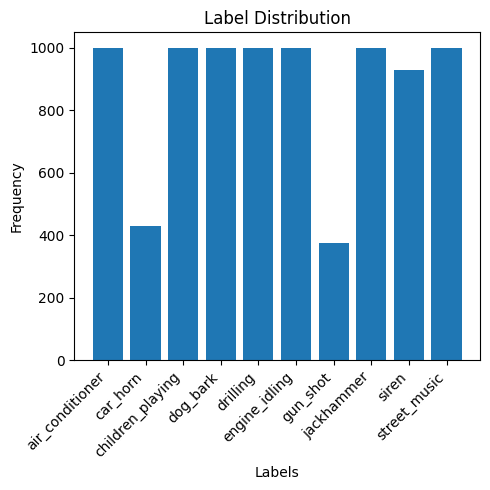

In [11]:
# display a histogram of label distribution in y
plt.figure(figsize=(5, 5))
plt.bar([sound_classes[label] for label in unique_labels], [class_distribution[label] for label in unique_labels])
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

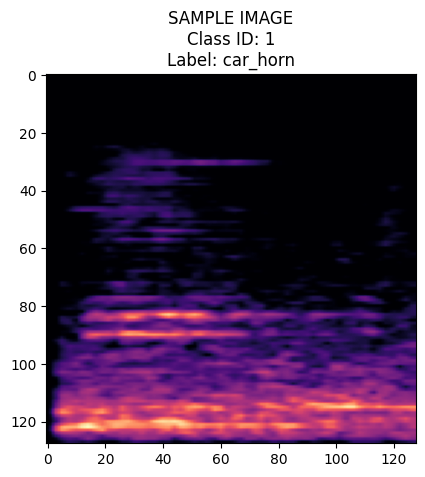

In [12]:
# visualize a sample data for one class in the dataset
index = 1000
plt.title("SAMPLE IMAGE\nClass ID: {}\nLabel: {}".format(y[index], sound_classes[y[index]]))
plt.imshow(X[index], cmap='magma');

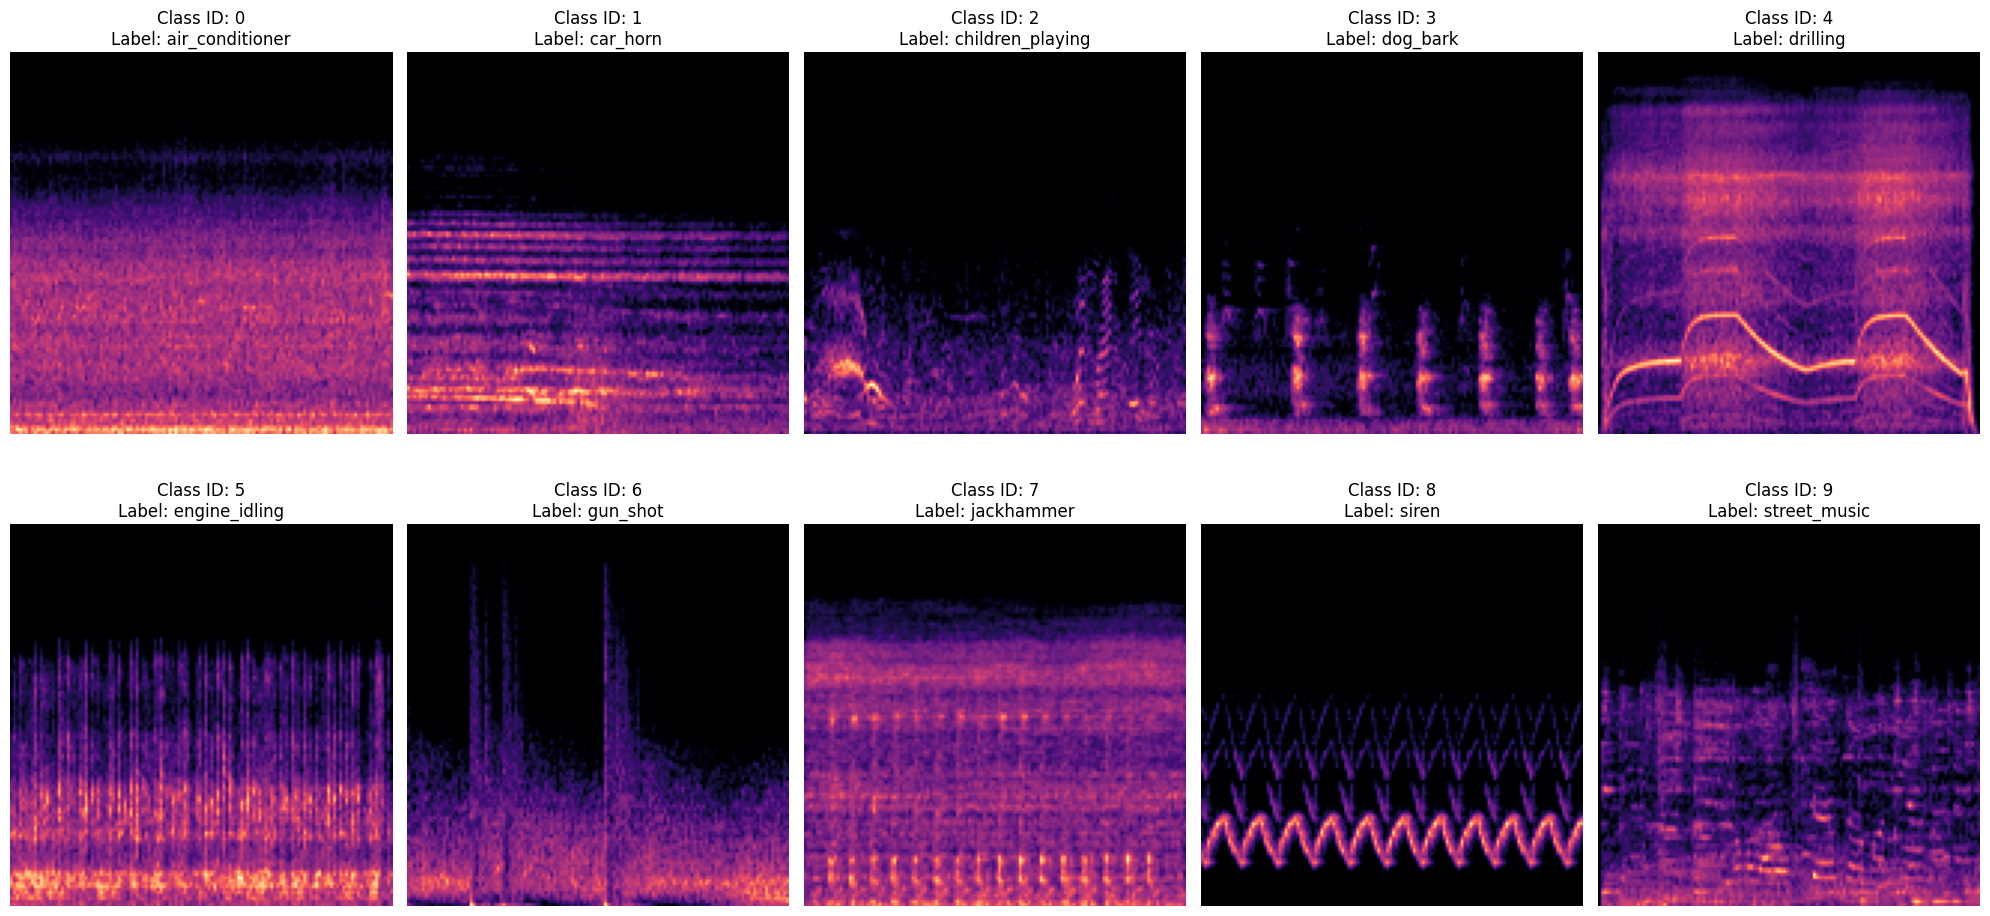

In [13]:
# visualize a sample data for each class in the dataset
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
index = [25, 1275, 2375, 3050, 4250, 5250, 5485, 6050, 7050, 8500]
for i, ax in enumerate(axes.flat):
    ax.axis('off')
    ax.set_title("Class ID: {}\nLabel: {}".format(y[index[i]], sound_classes[y[index[i]]]))
    ax.imshow(X[index[i]], cmap='magma')
plt.tight_layout()
plt.show()

## Model Creation and Training

In this section, we'll define and train the model for our project.

In [14]:
# split the data into training, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
# define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [16]:
# display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [17]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [19]:
# train the model
history = model.fit(X_train, y_train, epochs=10, callbacks=[early_stopping], validation_data=(X_val, y_val))

Epoch 1/10
191/191 [==============================] - 20s 97ms/step - loss: 1.6089 - accuracy: 0.4288 - val_loss: 1.0404 - val_accuracy: 0.6634
Epoch 2/10
191/191 [==============================] - 18s 95ms/step - loss: 1.0849 - accuracy: 0.6365 - val_loss: 0.8170 - val_accuracy: 0.7244
Epoch 3/10
191/191 [==============================] - 18s 96ms/step - loss: 0.8096 - accuracy: 0.7286 - val_loss: 0.6978 - val_accuracy: 0.7763
Epoch 4/10
191/191 [==============================] - 18s 97ms/step - loss: 0.6412 - accuracy: 0.7876 - val_loss: 0.5598 - val_accuracy: 0.8038
Epoch 5/10
191/191 [==============================] - 18s 96ms/step - loss: 0.5203 - accuracy: 0.8217 - val_loss: 0.5776 - val_accuracy: 0.8229
Epoch 6/10
191/191 [==============================] - 18s 96ms/step - loss: 0.4187 - accuracy: 0.8570 - val_loss: 0.5741 - val_accuracy: 0.8336
Epoch 7/10
191/191 [==============================] - 19s 97ms/step - loss: 0.3421 - accuracy: 0.8889 - val_loss: 0.5214 - val_accuracy:

In [20]:
# save the model
model.save("urban_sound_classification_model.h5")

In [21]:
# load the model
model = models.load_model("urban_sound_classification_model.h5")

## Model Accuracy and Loss

In this section, we'll visualize the accuracy and loss of our model using appropriate plots.

In [22]:
# evaluate the model on train set
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"-> Train Loss\t\t: {train_loss:.5f}\n-> Train Accuracy\t: {train_accuracy:.5f}\n")

# evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"-> Validation Loss\t: {val_loss:.5f}\n-> Validation Accuracy\t: {val_accuracy:.5f}\n")

# evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"-> Test Loss\t\t: {test_loss:.5f}\n-> Test Accuracy\t: {test_accuracy:.5f}\n")

# overall result
overall_loss, overall_accuracy = model.evaluate(X, y)
print(f"-> Overall Loss\t\t: {overall_loss:.5f}\n-> Overall Accuracy\t: {overall_accuracy:.5f}")

191/191 [==============================] - 5s 24ms/step - loss: 0.0746 - accuracy: 0.9833
-> Train Loss		: 0.07455
-> Train Accuracy	: 0.98331

41/41 [==============================] - 1s 24ms/step - loss: 0.5037 - accuracy: 0.8527
-> Validation Loss	: 0.50371
-> Validation Accuracy	: 0.85267

41/41 [==============================] - 1s 25ms/step - loss: 0.5509 - accuracy: 0.8504
-> Test Loss		: 0.55092
-> Test Accuracy	: 0.85038

273/273 [==============================] - 7s 24ms/step - loss: 0.2104 - accuracy: 0.9438
-> Overall Loss		: 0.21040
-> Overall Accuracy	: 0.94377


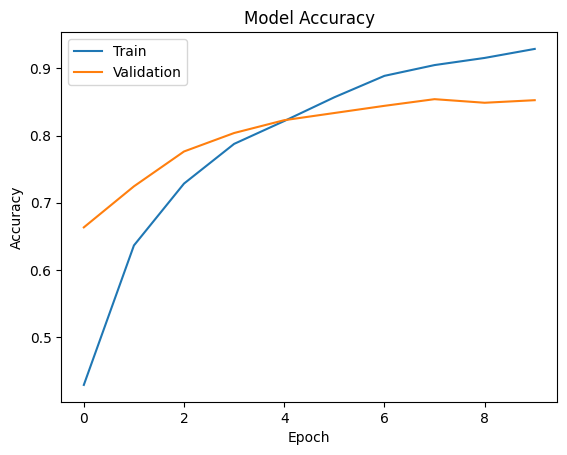

In [23]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

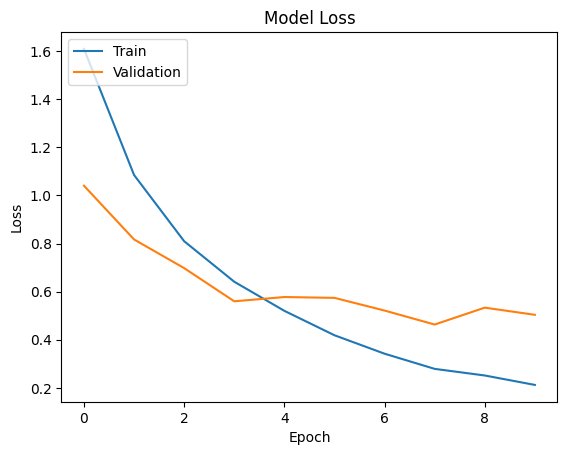

In [24]:
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
# predict urban sound classes for randomly selected audio files
correct_guess = 0

for i in range(10):
    display(HTML(f"<h1 style='font-size:15px; color:orange;'>TEST {i+1}</h1>"))
    path, true_class = us.select_random_audio_file(audio_folder_path)
    
    signal, sr = librosa.load(path, sr=None)
    spec = us.create_spectrogram(signal)
    spec_flipped = np.flipud(spec)
    plt.imsave('spec_test.png', spec_flipped, cmap='magma')
    
    spec_test = cv2.imread('spec_test.png')
    spec_norm = us.preprocess_image(spec_test, (128, 128))
    
    predictions = model.predict(np.array([spec_norm]))
    predicted_class = np.argmax(predictions)
    
    correct_guess += 1 if true_class == predicted_class else 0
    
    print("-> Audio File Path :", path)
    print("--- PREDICTIONS ---")
    
    for j, prob in enumerate(predictions[0]):
        print(f"-> Class {j}         : {prob:.10f} ({sound_classes[j]})")

    print("--- RESULTS ---")
    print("-> True Class      :", sound_classes[true_class])
    print("-> Predicted Class :", sound_classes[predicted_class])
    print(f"{Fore.GREEN}-> RIGHT GUESS :)\n" if true_class == predicted_class else f"{Fore.RED}-> WRONG GUESS :(\n")
    display(Audio(signal, rate=sr, embed=True))
    print("\n")

correct_rate = correct_guess * 10
print("-----------------------------------")
display(HTML(f"<h1 style='font-size:25px; color:#5aaaff;'>-> ACCURACY RATE: {correct_rate}%</h1>"))

os.remove('spec_test.png')

1/1 [==============================] - 0s 111ms/step
-> Audio File Path : UrbanSound8K\audio\fold3\176783-3-0-3.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000000000 (air_conditioner)
-> Class 1         : 0.0000000000 (car_horn)
-> Class 2         : 0.0000020863 (children_playing)
-> Class 3         : 0.9999978542 (dog_bark)
-> Class 4         : 0.0000000000 (drilling)
-> Class 5         : 0.0000000000 (engine_idling)
-> Class 6         : 0.0000000000 (gun_shot)
-> Class 7         : 0.0000000000 (jackhammer)
-> Class 8         : 0.0000000001 (siren)
-> Class 9         : 0.0000000000 (street_music)
--- RESULTS ---
-> True Class      : dog_bark
-> Predicted Class : dog_bark
-> RIGHT GUESS :)



1/1 [==============================] - 0s 23ms/step
-> Audio File Path : UrbanSound8K\audio\fold1\46656-6-4-0.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000000000 (air_conditioner)
-> Class 1         : 0.0000000000 (car_horn)
-> Class 2         : 0.0000000004 (children_playing)
-> Class 3         : 0.0000000063 (dog_bark)
-> Class 4         : 0.0000000203 (drilling)
-> Class 5         : 0.0000000000 (engine_idling)
-> Class 6         : 1.0000000000 (gun_shot)
-> Class 7         : 0.0000000000 (jackhammer)
-> Class 8         : 0.0000000000 (siren)
-> Class 9         : 0.0000000000 (street_music)
--- RESULTS ---
-> True Class      : gun_shot
-> Predicted Class : gun_shot
-> RIGHT GUESS :)



1/1 [==============================] - 0s 27ms/step
-> Audio File Path : UrbanSound8K\audio\fold4\24347-8-0-89.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000000000 (air_conditioner)
-> Class 1         : 0.0000000009 (car_horn)
-> Class 2         : 0.0000000034 (children_playing)
-> Class 3         : 0.0000017794 (dog_bark)
-> Class 4         : 0.0000000002 (drilling)
-> Class 5         : 0.0000000000 (engine_idling)
-> Class 6         : 0.0000000000 (gun_shot)
-> Class 7         : 0.0000000000 (jackhammer)
-> Class 8         : 0.9999982119 (siren)
-> Class 9         : 0.0000000058 (street_music)
--- RESULTS ---
-> True Class      : siren
-> Predicted Class : siren
-> RIGHT GUESS :)



1/1 [==============================] - 0s 31ms/step
-> Audio File Path : UrbanSound8K\audio\fold6\162434-6-1-0.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000018728 (air_conditioner)
-> Class 1         : 0.0000000138 (car_horn)
-> Class 2         : 0.0000228363 (children_playing)
-> Class 3         : 0.0000707609 (dog_bark)
-> Class 4         : 0.0000188272 (drilling)
-> Class 5         : 0.0000001595 (engine_idling)
-> Class 6         : 0.9998849630 (gun_shot)
-> Class 7         : 0.0000000700 (jackhammer)
-> Class 8         : 0.0000000937 (siren)
-> Class 9         : 0.0000003631 (street_music)
--- RESULTS ---
-> True Class      : gun_shot
-> Predicted Class : gun_shot
-> RIGHT GUESS :)



1/1 [==============================] - 0s 26ms/step
-> Audio File Path : UrbanSound8K\audio\fold6\204240-0-0-23.wav
--- PREDICTIONS ---
-> Class 0         : 0.9977253079 (air_conditioner)
-> Class 1         : 0.0000034817 (car_horn)
-> Class 2         : 0.0000004014 (children_playing)
-> Class 3         : 0.0000076856 (dog_bark)
-> Class 4         : 0.0000674130 (drilling)
-> Class 5         : 0.0019186573 (engine_idling)
-> Class 6         : 0.0000000191 (gun_shot)
-> Class 7         : 0.0000009805 (jackhammer)
-> Class 8         : 0.0000255254 (siren)
-> Class 9         : 0.0002503539 (street_music)
--- RESULTS ---
-> True Class      : air_conditioner
-> Predicted Class : air_conditioner
-> RIGHT GUESS :)



1/1 [==============================] - 0s 23ms/step
-> Audio File Path : UrbanSound8K\audio\fold5\162432-6-14-0.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000174125 (air_conditioner)
-> Class 1         : 0.0000000294 (car_horn)
-> Class 2         : 0.0000629792 (children_playing)
-> Class 3         : 0.0015838562 (dog_bark)
-> Class 4         : 0.0000975862 (drilling)
-> Class 5         : 0.0000083033 (engine_idling)
-> Class 6         : 0.9982276559 (gun_shot)
-> Class 7         : 0.0000016593 (jackhammer)
-> Class 8         : 0.0000001619 (siren)
-> Class 9         : 0.0000003832 (street_music)
--- RESULTS ---
-> True Class      : gun_shot
-> Predicted Class : gun_shot
-> RIGHT GUESS :)



1/1 [==============================] - 0s 22ms/step
-> Audio File Path : UrbanSound8K\audio\fold2\100652-3-0-0.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000000000 (air_conditioner)
-> Class 1         : 0.0000000000 (car_horn)
-> Class 2         : 0.0000000004 (children_playing)
-> Class 3         : 1.0000000000 (dog_bark)
-> Class 4         : 0.0000000000 (drilling)
-> Class 5         : 0.0000000000 (engine_idling)
-> Class 6         : 0.0000000000 (gun_shot)
-> Class 7         : 0.0000000000 (jackhammer)
-> Class 8         : 0.0000000000 (siren)
-> Class 9         : 0.0000000000 (street_music)
--- RESULTS ---
-> True Class      : dog_bark
-> Predicted Class : dog_bark
-> RIGHT GUESS :)



1/1 [==============================] - 0s 24ms/step
-> Audio File Path : UrbanSound8K\audio\fold8\54383-0-0-6.wav
--- PREDICTIONS ---
-> Class 0         : 0.5461834073 (air_conditioner)
-> Class 1         : 0.0004954410 (car_horn)
-> Class 2         : 0.0011944340 (children_playing)
-> Class 3         : 0.0049273744 (dog_bark)
-> Class 4         : 0.2427086234 (drilling)
-> Class 5         : 0.1897573322 (engine_idling)
-> Class 6         : 0.0084842369 (gun_shot)
-> Class 7         : 0.0008553806 (jackhammer)
-> Class 8         : 0.0013815369 (siren)
-> Class 9         : 0.0040121824 (street_music)
--- RESULTS ---
-> True Class      : air_conditioner
-> Predicted Class : air_conditioner
-> RIGHT GUESS :)



1/1 [==============================] - 0s 23ms/step
-> Audio File Path : UrbanSound8K\audio\fold4\99157-9-0-31.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000176311 (air_conditioner)
-> Class 1         : 0.0000032809 (car_horn)
-> Class 2         : 0.4507249594 (children_playing)
-> Class 3         : 0.0004164108 (dog_bark)
-> Class 4         : 0.0000000456 (drilling)
-> Class 5         : 0.0000135633 (engine_idling)
-> Class 6         : 0.0000000178 (gun_shot)
-> Class 7         : 0.0000001282 (jackhammer)
-> Class 8         : 0.0000036939 (siren)
-> Class 9         : 0.5488203168 (street_music)
--- RESULTS ---
-> True Class      : street_music
-> Predicted Class : street_music
-> RIGHT GUESS :)



1/1 [==============================] - 0s 29ms/step
-> Audio File Path : UrbanSound8K\audio\fold7\102853-8-0-2.wav
--- PREDICTIONS ---
-> Class 0         : 0.0000000000 (air_conditioner)
-> Class 1         : 0.0000000235 (car_horn)
-> Class 2         : 0.0000213669 (children_playing)
-> Class 3         : 0.0026231401 (dog_bark)
-> Class 4         : 0.0000002792 (drilling)
-> Class 5         : 0.0000000026 (engine_idling)
-> Class 6         : 0.0000000000 (gun_shot)
-> Class 7         : 0.0000000000 (jackhammer)
-> Class 8         : 0.9973522425 (siren)
-> Class 9         : 0.0000029386 (street_music)
--- RESULTS ---
-> True Class      : siren
-> Predicted Class : siren
-> RIGHT GUESS :)





-----------------------------------
